In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv(r'Diwali Sales Data.csv', encoding = 'unicode_escape')

In [4]:
df.shape

(11251, 15)

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
df.drop(['Status','unnamed1'],axis = 1, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [9]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
df.shape

(11251, 13)

In [11]:
df.dropna(inplace = True)

In [12]:
df.shape

(11239, 13)

In [13]:
df['Amount'] = df['Amount'].astype('int')

In [14]:
df['Amount'].dtypes

dtype('int32')

In [15]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [16]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [17]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# ***Exploratory Data Analysis***

***Gender***

In [18]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

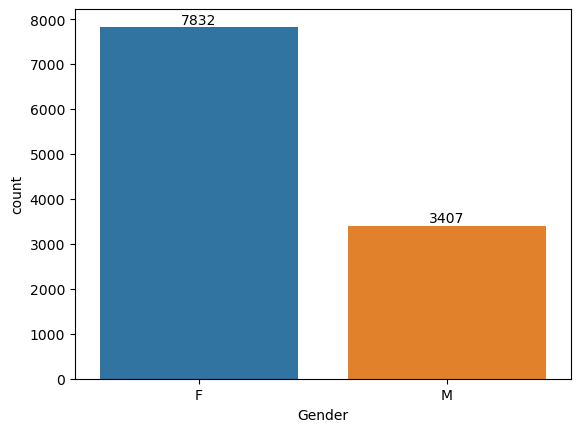

In [19]:
g = sns.countplot(x='Gender',data=df)

for bars in g.containers:
    g.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

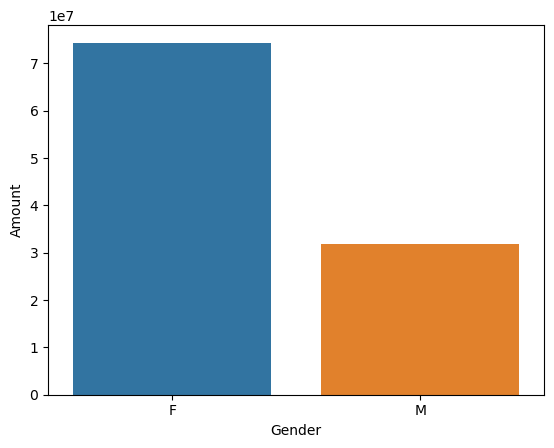

In [20]:
sales_gen = df.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False)

sns.barplot(x = 'Gender',y = 'Amount', data = sales_gen  )

### ***From the depicted bar graphs, it's evident that the majority of buyers are female. Moreover, the purchasing power of females surpasses that of males ***

# ***Age***

In [21]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

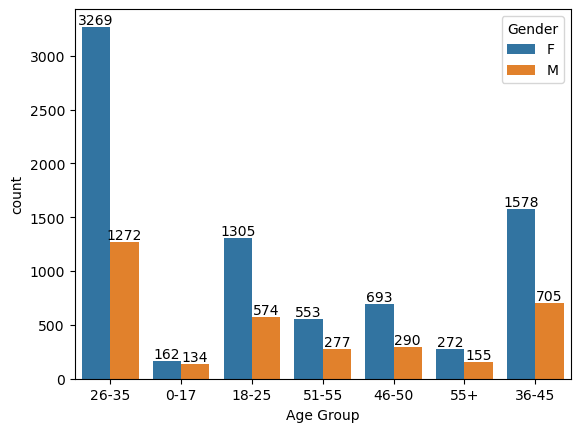

In [22]:
x = sns.countplot(x='Age Group',data=df, hue = 'Gender')

for bars in x.containers:
    x.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

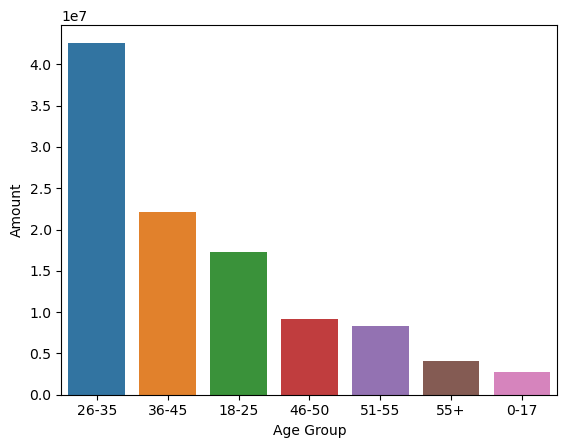

In [23]:
sales_age = df.groupby(['Age Group'], as_index= False)['Amount'].sum().sort_values( by = 'Amount', ascending = False )
sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age)

### ***From the visual representation above, it becomes evident that the primary segment of buyers falls within the age group of 26-35 years, with females constituting the majority***

# ***State***

In [24]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Amount'>

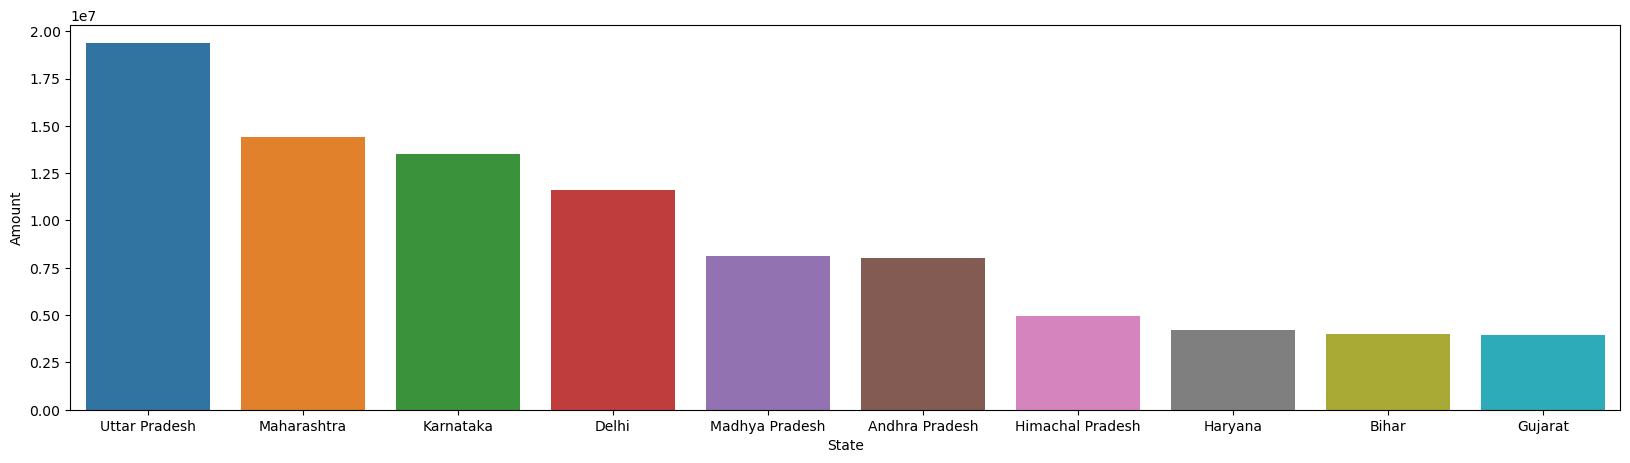

In [25]:
sales_by_state = df.groupby(['State'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending =False).head(10)

plt.figure(figsize=(20,5))
sns.barplot(x= 'State', y= 'Amount' , data = sales_by_state)

<Axes: xlabel='State', ylabel='Orders'>

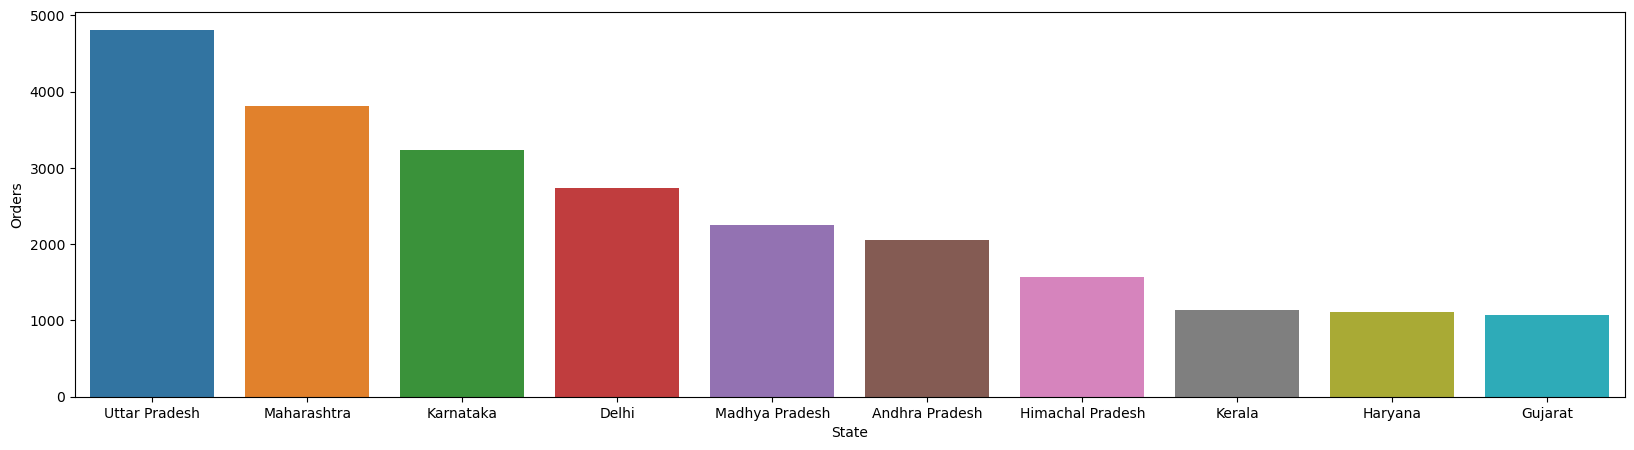

In [26]:
order_by_state = df.groupby(['State'],as_index= False)['Orders'].sum().sort_values(by='Orders', ascending = False).head(10)

plt.figure(figsize=(20,5))
sns.barplot(x = 'State', y = 'Orders', data = order_by_state )

<Axes: xlabel='Zone', ylabel='Amount'>

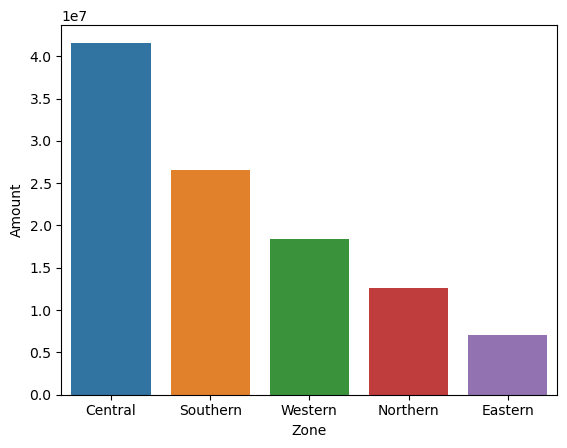

In [27]:
zone_sales = df.groupby(['Zone'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending  =False)
sns.barplot(x = 'Zone', y = 'Amount', data = zone_sales)

### ***The visual representation indicates that the majority of orders and total sales/amount are contributed by the states of Uttar Pradesh, Maharashtra, and Karnataka, in that order.***

# ***Marital Status***

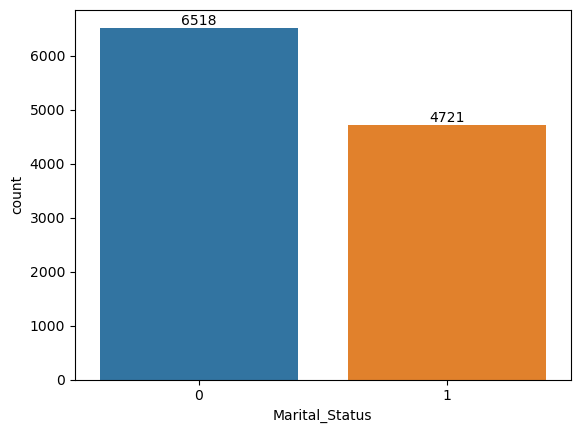

<Figure size 700x500 with 0 Axes>

In [28]:
m = sns.countplot(x = 'Marital_Status', data = df )

plt.figure(figsize = (7,5))

for bars in m.containers:
    m.bar_label(bars)

In [29]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='Marital_Status', ylabel='Amount'>

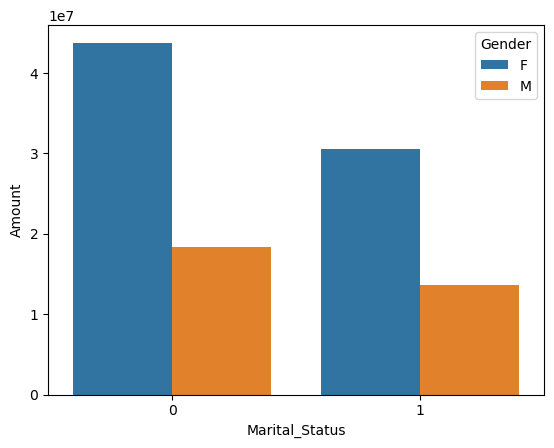

In [30]:
sales_gender = df.groupby(['Marital_Status','Gender'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Marital_Status', y = 'Amount', hue = 'Gender' ,data = sales_gender)

### ***Based on the displayed graphs, it's evident that a substantial number of buyers are married women who possess considerable purchasing power.***

# ***Occupation***

In [31]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

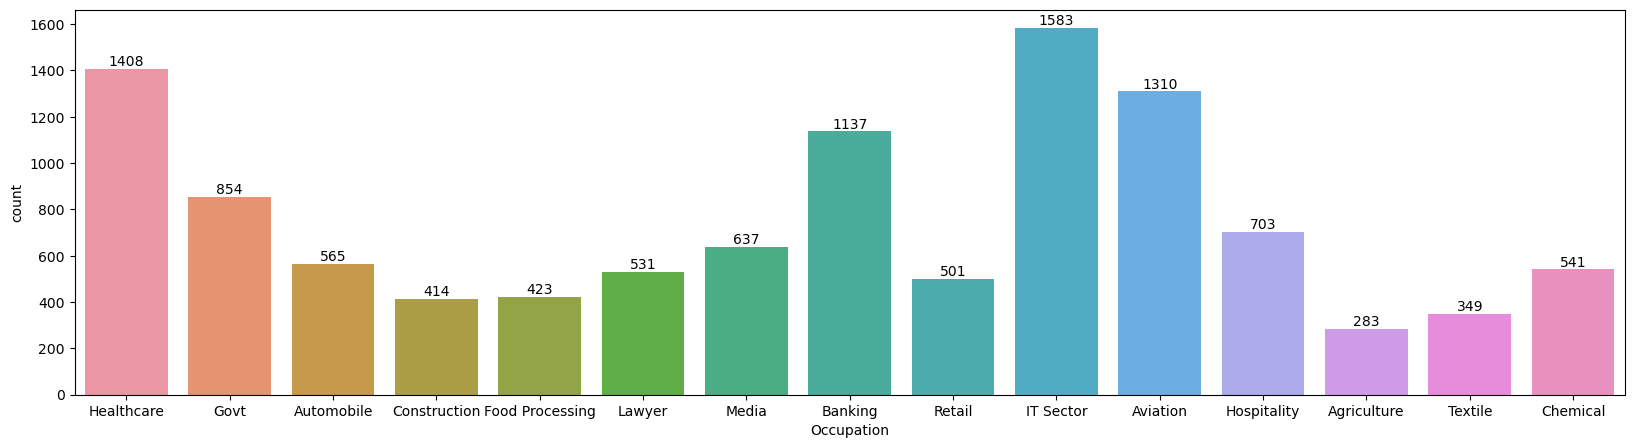

In [41]:
plt.figure(figsize=(20,5))
o = sns.countplot(x = 'Occupation', data = df )

for bars in o.containers:
    o.bar_label(bars)

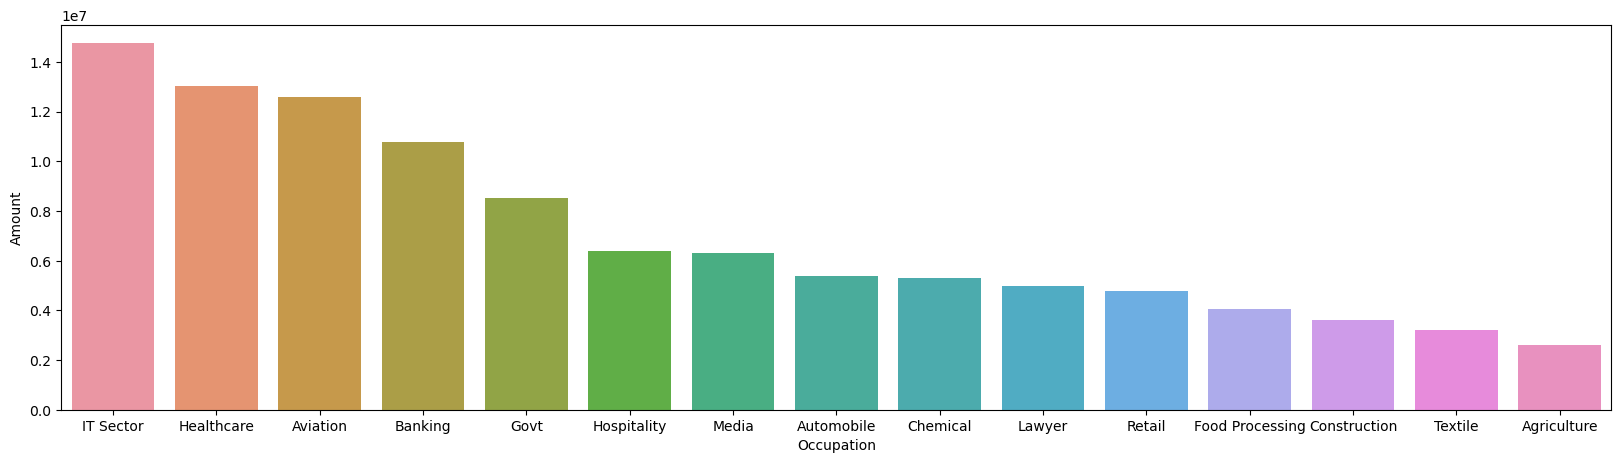

In [45]:
sales_ocupation = df.groupby(['Occupation'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

plt.figure(figsize = (20,5))
s_o = sns.barplot(x = 'Occupation', y= 'Amount', data = sales_ocupation)

### ***The visual depiction above reveals that a considerable portion of buyers are employed within the IT, Healthcare, and Aviation sectors.***

# ***Product***

In [46]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

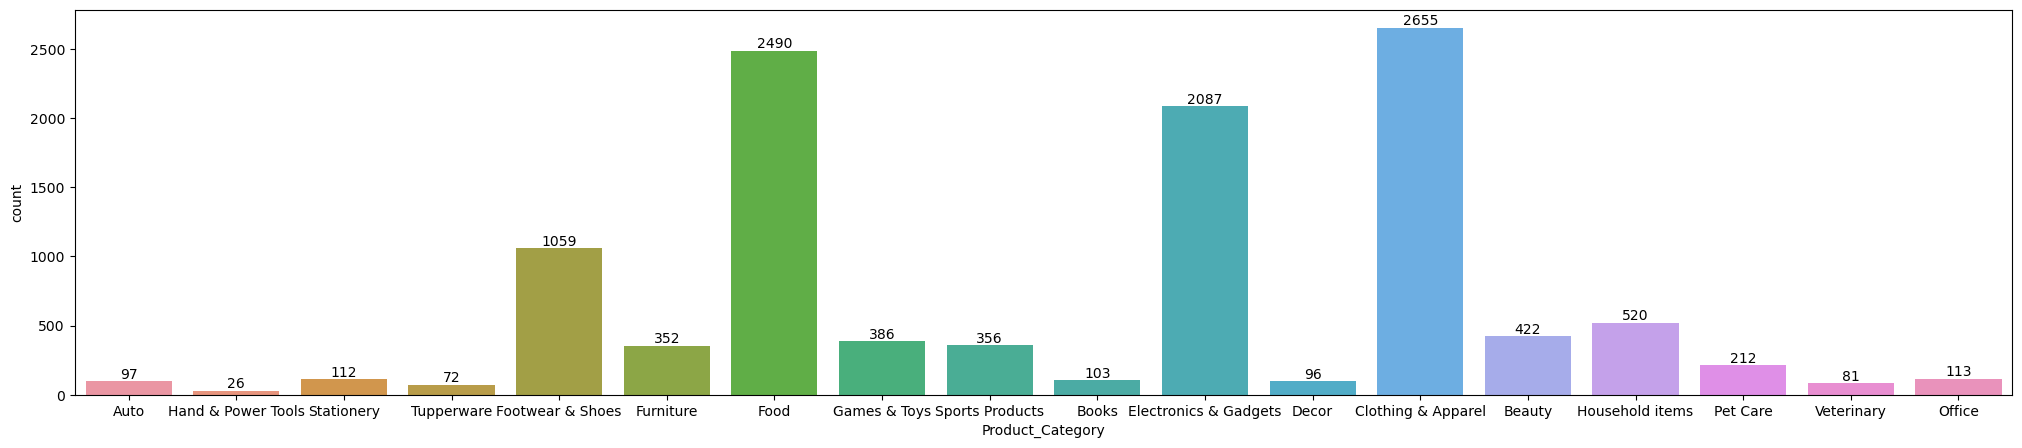

In [51]:
plt.figure(figsize=(25,5))
sales_product = sns.countplot(x= 'Product_Category', data = df)

for bars in sales_product.containers:
    sales_product.bar_label(bars)

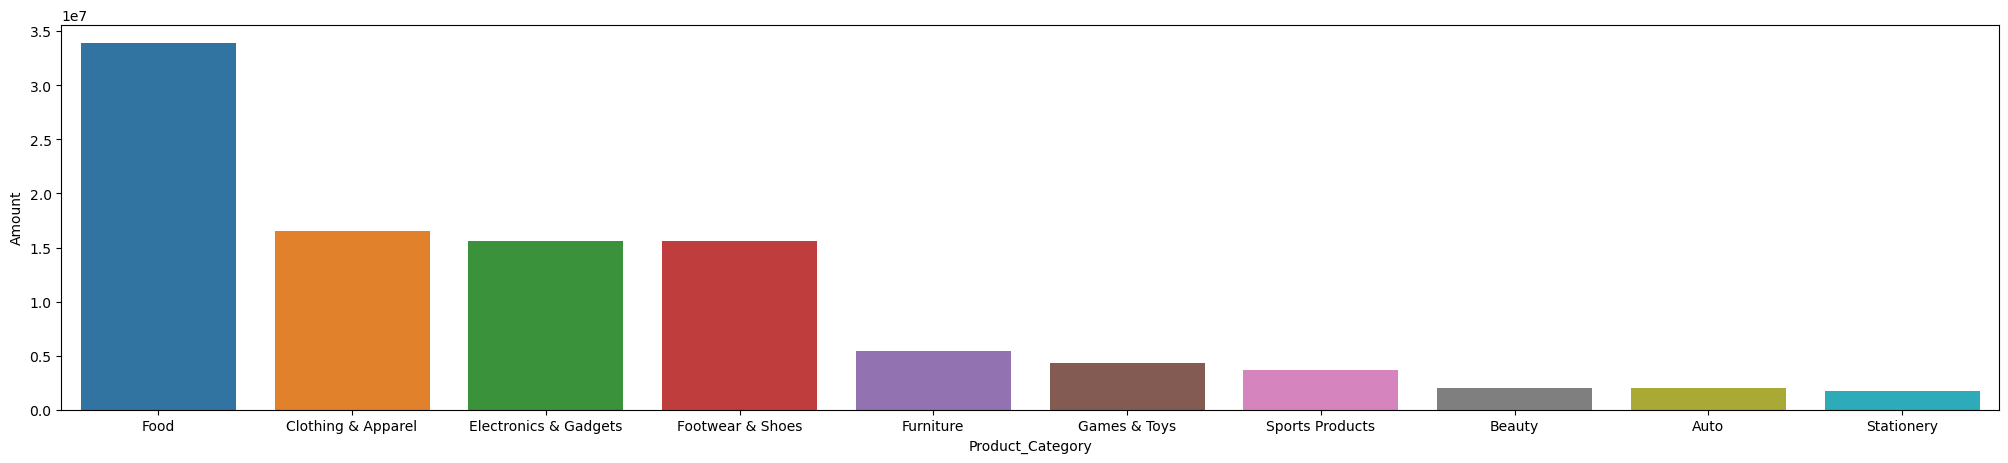

In [53]:
sales_product = df.groupby(['Product_Category'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

plt.figure(figsize=(25,5))
ax = sns.barplot(x= 'Product_Category', y= 'Amount', data = sales_product )

In [54]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

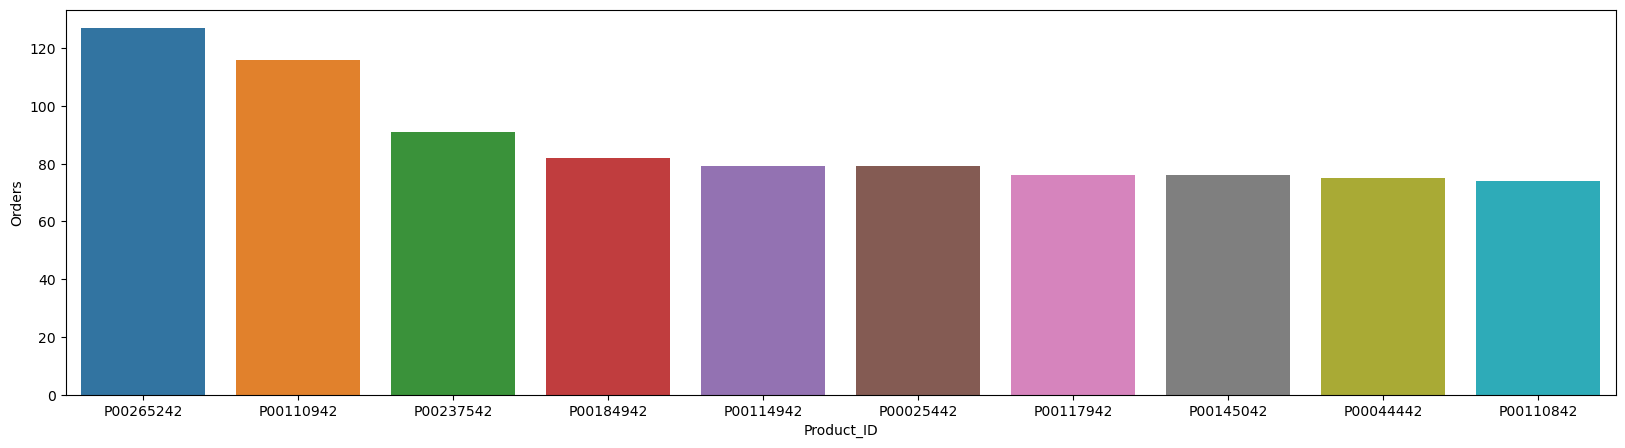

In [58]:
product_orders = df.groupby(['Product_ID'],as_index = False)['Orders'].sum().sort_values(by= 'Orders', ascending  =False).head(10)

plt.figure(figsize=(20,5))
po = sns.barplot(x= 'Product_ID', y= 'Orders', data = product_orders)

### ***The presented graphs highlight that a significant majority of the sold products belong to the Food, Clothing, and Electronics categories.***

### CONCLUSION :

#### 1.	Buyer Demographics: Predominantly, female buyers exhibit higher purchasing power compared to males.
#### 2.	Age Group Insights: Buyers aged 26-35 years, predominantly female, form the core segment.
#### 3.	Geographical Impact: Uttar Pradesh, Maharashtra, and Karnataka lead in contributing to orders and total sales.
#### 4.	Marital Status Impact: Married women buyers stand out with notable purchasing influence.
#### 5.	Sector Influence: IT, Healthcare, and Aviation sectors host a substantial portion of the buying demographic.
#### 6.	Product Preferences: Food, Clothing, and Electronics categories dominate the products sold.